In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

The dataset is about forest fire in Portugal, detailed information can be found here: http://archive.ics.uci.edu/ml/datasets/Forest+Fires

# Atribut Information

For more information, read [Cortez and Morais, 2007].

- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month - month of the year: 'jan' to 'dec'
- day - day of the week: 'mon' to 'sun'
- FFMC - FFMC index from the FWI system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3
- DC - DC index from the FWI system: 7.9 to 860.6
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
- area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [12]:
data = pd.read_csv('../dataset/forestfires.csv')

In [13]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.shape

(517, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Data Preparation

In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
data_ohe = ohe.fit_transform(data[['month','day']])

data_ohe = pd.DataFrame(data_ohe, columns=[f"ohe_{i}" for i in range(data_ohe.shape[1])])

data = pd.concat([data, data_ohe], axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['month'] = encoder.fit_transform(data['month'])
data['day'] = encoder.fit_transform(data['day'])

In [30]:
data['location'] = data['X'].astype('string')+'-'+data['Y'].astype('string')

In [32]:
data['location'] = encoder.fit_transform(data['location'])

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(['area','X','Y'], axis = 1)
y = data['area']

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      train_size=0.8, 
                                                      test_size=0.2,
                                                      random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

## Pre-processing y_train

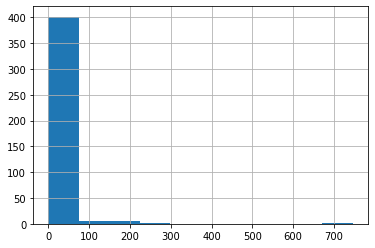

In [41]:
y_train.hist()

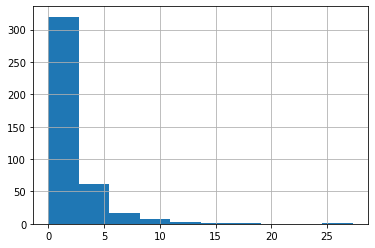

In [42]:
np.sqrt(y_train).hist()

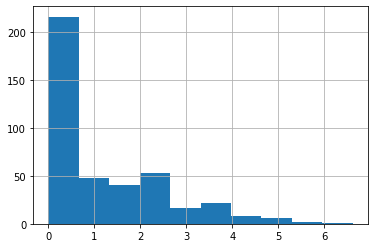

In [51]:
np.log1p(y_train).hist()

In [52]:
y_train_trf = np.log1p(y_train)

# Model

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Hyperparameter Tuning

- Epoch
- Batch Size
- Learning Rate
- Optimizer
- Activation Function
- Neuron
- Layer

# Base Model - NN Architecture

In [103]:
model = Sequential()
model.add(Dense(15, input_dim=30, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='he_uniform'))

In [104]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [105]:
model.fit(X_train, y_train_trf, epochs=500, batch_size = 64, shuffle=False)

Epoch 1/500
7/7 [==============================] - 0s 961us/step - loss: 6.8337 - accuracy: 0.4746
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 6.0694 - accuracy: 0.4722
Epoch 3/500
7/7 [==============================] - 0s 863us/step - loss: 5.4505 - accuracy: 0.4625
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 4.9403 - accuracy: 0.4479
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 4.5206 - accuracy: 0.4407
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 4.1682 - accuracy: 0.4286
Epoch 7/500
7/7 [==============================] - 0s 1ms/step - loss: 3.8741 - accuracy: 0.4140
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 3.6232 - accuracy: 0.3923
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 3.4034 - accuracy: 0.3680
Epoch 10/500
7/7 [==============================] - 0s 1ms/step - loss: 3.2097 - accuracy: 0.3462
Epoch 11/500
7/7 [=======

7/7 [==============================] - 0s 2ms/step - loss: 1.2825 - accuracy: 0.1453
Epoch 167/500
7/7 [==============================] - 0s 1ms/step - loss: 1.2794 - accuracy: 0.1453
Epoch 168/500
7/7 [==============================] - 0s 873us/step - loss: 1.2765 - accuracy: 0.1477
Epoch 169/500
7/7 [==============================] - 0s 814us/step - loss: 1.2732 - accuracy: 0.1477
Epoch 170/500
7/7 [==============================] - 0s 2ms/step - loss: 1.2705 - accuracy: 0.1501
Epoch 171/500
7/7 [==============================] - 0s 827us/step - loss: 1.2678 - accuracy: 0.1501
Epoch 172/500
7/7 [==============================] - 0s 1ms/step - loss: 1.2646 - accuracy: 0.1501
Epoch 173/500
7/7 [==============================] - 0s 2ms/step - loss: 1.2620 - accuracy: 0.1501
Epoch 174/500
7/7 [==============================] - 0s 914us/step - loss: 1.2588 - accuracy: 0.1477
Epoch 175/500
7/7 [==============================] - 0s 821us/step - loss: 1.2559 - accuracy: 0.1501
Epoch 176/500


7/7 [==============================] - 0s 852us/step - loss: 0.9086 - accuracy: 0.2373
Epoch 329/500
7/7 [==============================] - 0s 1ms/step - loss: 0.9067 - accuracy: 0.2373
Epoch 330/500
7/7 [==============================] - 0s 1ms/step - loss: 0.9045 - accuracy: 0.2397
Epoch 331/500
7/7 [==============================] - 0s 777us/step - loss: 0.9031 - accuracy: 0.2421
Epoch 332/500
7/7 [==============================] - 0s 1ms/step - loss: 0.9014 - accuracy: 0.2397
Epoch 333/500
7/7 [==============================] - 0s 1ms/step - loss: 0.8992 - accuracy: 0.2397
Epoch 334/500
7/7 [==============================] - 0s 832us/step - loss: 0.8977 - accuracy: 0.2397
Epoch 335/500
7/7 [==============================] - 0s 1ms/step - loss: 0.8960 - accuracy: 0.2373
Epoch 336/500
7/7 [==============================] - 0s 811us/step - loss: 0.8945 - accuracy: 0.2373
Epoch 337/500
7/7 [==============================] - 0s 1ms/step - loss: 0.8924 - accuracy: 0.2373
Epoch 338/500
7/

7/7 [==============================] - 0s 826us/step - loss: 0.7721 - accuracy: 0.2809
Epoch 411/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7704 - accuracy: 0.2809
Epoch 412/500
7/7 [==============================] - 0s 889us/step - loss: 0.7690 - accuracy: 0.2833
Epoch 413/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.2833
Epoch 414/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7659 - accuracy: 0.2809
Epoch 415/500
7/7 [==============================] - 0s 778us/step - loss: 0.7639 - accuracy: 0.2857
Epoch 416/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7623 - accuracy: 0.2857
Epoch 417/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 0.2833
Epoch 418/500
7/7 [==============================] - 0s 830us/step - loss: 0.7595 - accuracy: 0.2857
Epoch 419/500
7/7 [==============================] - 0s 1ms/step - loss: 0.7580 - accuracy: 0.2857
Epoch 420/500
7/

In [106]:
y_pred = model.predict(X_valid)

In [107]:
y_pred_inv = np.exp(y_pred) - 1

In [108]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_valid, y_pred_inv, squared=False)
rmse

110.75143082029624